### 1. Поместить в центр рисунка белый квадрат, занимающий 10% площади рисунка.

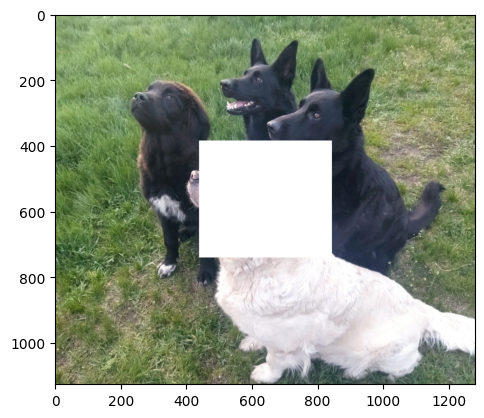

In [6]:
import math
from matplotlib.image import imread, imsave
import matplotlib.pyplot as plt
import numpy as np

orig_img = imread('01.jpg')


def white_square(orig):
    img = np.asarray(orig.copy())

    height, width, _ = img.shape
    square_height = int(height * math.sqrt(0.1))
    square_width = int(width * math.sqrt(0.1))
    x0 = (width - square_width) // 2
    x1 = x0 + square_width
    y0 = (height - square_height) // 2
    y1 = y0 + square_height

    img[y0:y1, x0:x1] = (255, 255, 255)
    
    return img


result = white_square(orig_img)
plt.imshow(result)
plt.show()

### 2. Поместить в случайном месте каждого кадра видеопотока белый кварат со стороной 50 px.

In [12]:
import cv2

url = 'https://example-files.online-convert.com/video/mp4/example_small.mp4'
capture = cv2.VideoCapture(url)

width = int(capture.get(3))
height = int(capture.get(4))

size = 50

while True:
    rtrn, image = capture.read()
    if image is None:
        break
    
    x = np.random.randint(0, width - size)
    y = np.random.randint(0, height - size)

    image[y:y+size, x:x+size] = (255, 255, 255)

    cv2.imshow("OpenCV", image)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

capture.release()
cv2.destroyAllWindows()

### №3

1. Найти в обучающем наборе esc50-dataset WAV файл с лаем собаки;
2. визуально по графику амплитуды звуковой волны найти участок файла непосредственно содержащий звук лая;
3. построить спектрограмму для найденного участка;
4. подумать (и реализовать), как с помощиью цифрового представления звука можно автоматизировать удаление части файла, не содержащего полезной информации.

In [18]:
import soundfile as sf
import io
from urllib.request import urlopen
import IPython.display as ipd


audio_data = 'https://github.com/karolpiczak/ESC-50/raw/master/audio/1-97392-A-0.wav'

data, sr = sf.read(io.BytesIO(urlopen(audio_data).read()))
ipd.Audio(audio_data)

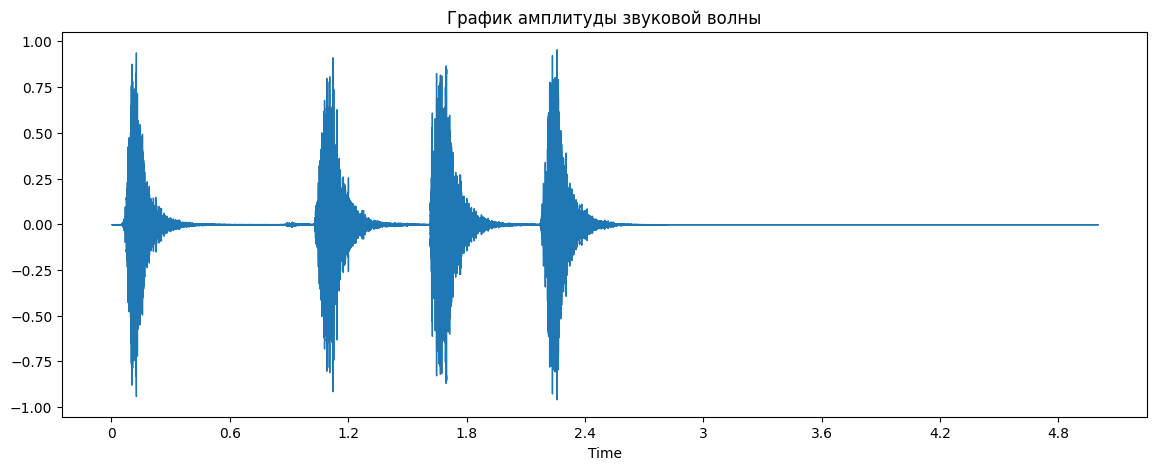

In [19]:
import librosa
import matplotlib.pyplot as plt

# Построить график амплитуды звуковой волны
plt.figure(figsize=(14, 5))
librosa.display.waveshow(data, sr=sr)
plt.title('График амплитуды звуковой волны')
plt.show()


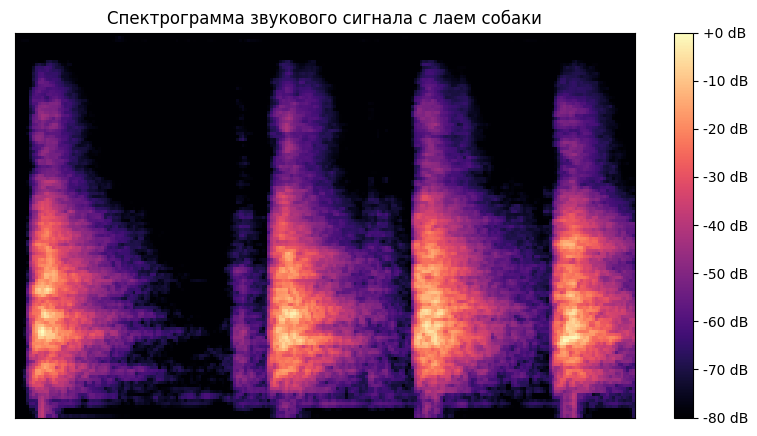

In [24]:
start_time = 0
end_time = 2.5

dog_bark_segment = data[int(start_time * sr):int(end_time * sr)]

plt.figure(figsize=(10, 5))
S = librosa.feature.melspectrogram(y=dog_bark_segment, sr=sr)
librosa.display.specshow(librosa.power_to_db(S, ref=np.max), sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('Спектрограмма звукового сигнала с лаем собаки')
plt.show()


In [29]:
energy = np.abs(data)
threshold = 0.01
mask = energy > threshold

filtered_data = data[mask]

# Сохранить отфильтрованный аудиофайл
filtered_audio_path = 'audio_1-97392-A-0_filtered.wav'
sf.write(filtered_audio_path, filtered_data, sr)
ipd.Audio(filtered_audio_path)


### №4

1. Создайте приложения для работы с API VK;
2. получите свой токен для автоматизации действий в соцсети;
3. соберите не менее 2000 не пустых текстовых сообщений со стены любой открытой группы;
4. сохраните сообщения во внешний файл для дальнейшего чтения и работы.

In [36]:
import requests

token = 'vk1.a.OAkLbdg7bUEzYmZU8l3u2KqkcJg5zXvRUbnauzoSoQfdPoN9QtBCZ_MOlQVXskNAYbDCSNIQwOpvTfn4m1u5VJqoE43B-Ro6soYCk5sBgTOl7EqWs4F2QTPlTNKCGTJLhs4tNB_baF0KR6g0PouFR_NnmCREeJRdRaCgqk8R3_26r0loK-b7GNihTPOYRf0T'
id = 'habr'

offset = 0
count = 100
result = []

while len(result) < 2000:
  json_response = requests.get(('https://api.vk.com/method/wall.get?count={}&offset={}&domain={}&v=5.103&access_token={}').
                               format(count, offset, id, token)).json()

  items = json_response['response']['items']

  for item in json_response['response']['items']:
    text = item['text']
    if len(text) != 0:
      result.append(text)

  offset += len(items)

for item in result[:10]:
  print(item)

f = open("vk_result.txt", "w", encoding="utf-8")
f.writelines(result)
f.close()

«Смотреть в этот бездонный колодец было больно. Поэтому мы решили действовать радикально: пофиксить все старые баги на багатоне и изменить работу с техподдержкой, чтобы не копить баги в таком количестве»

Колодец с неприоритетными багами, или Как в Lamoda Tech закрыли 50 задач за две недели и научились не копить их: https://u.habr.com/uvoRV

#разработка@habr #управление@habr #гиктаймс@habr
Встроенная в интерьер майнинг-ферма, домашняя приточная вентиляция с минимумом ручного труда и квартирное освещение по датчику движения.

Это десять лучших публикаций за всю историю из хаба «Умный дом»:

— Сколько стоит умный дом? Рассказываю, как строил свой и что получилось за 1000 руб./м²: https://u.habr.com/KR3JB

— Про котэ, жену, двух сыновей, идею… и не только. История с продолжением: https://u.habr.com/PHBPL

— Домашняя масляная майнинг-ферма: https://u.habr.com/PZy6C

— Как в панельном доме заменить старый конвектор на новый радиатор, чтобы не пожалеть о полученном результате? https://u.habr